# Credit Card Customer Segmentation Analysis

This notebook performs customer segmentation analysis on credit card customer data to identify distinct customer groups and their characteristics. The analysis helps in understanding customer behavior patterns and can be used for targeted marketing strategies.

## Analysis Overview
1. Data Loading and Initial Exploration
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Data Preprocessing
5. K-means Clustering
6. Cluster Analysis and Visualization
7. Business Insights

## 1. Import Required Libraries

We import essential Python libraries:
- pandas: for data manipulation and analysis
- numpy: for numerical operations
- matplotlib & seaborn: for data visualization
- sklearn: for machine learning operations (scaling and clustering)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set style for better visualizations
plt.style.use('seaborn')
sns.set_palette('Set2')

## 2. Data Loading and Initial Exploration

Load the dataset and perform initial checks to understand:
- Data structure and size
- Column types
- Basic statistics
- Missing values if any

In [ ]:
# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Display first few rows
print("First few rows of the dataset:")
df.head()

In [ ]:
# Check dataset information
print("\nDataset Information:")
df.info()

## 3. Exploratory Data Analysis (EDA)

We analyze the data distribution and relationships between variables through:
- Summary statistics
- Distribution plots
- Correlation analysis

This helps us understand the data better and identify potential patterns.

In [39]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,total_trans_amount,total_trans_count,avg_utilization_ratio
0,1001,28,M,1,College,Single,45000,36,3,2,1250.75,25,0.51
1,1002,35,F,2,Post-Graduate,Married,75000,48,4,1,3200.00,35,0.46
2,1003,24,M,0,College,Single,35000,24,2,3,450.25,15,0.40
3,1004,42,M,3,Doctorate,Married,120000,60,5,1,4500.50,45,0.57
4,1005,38,F,1,Post-Graduate,Divorced,65000,42,3,2,1800.25,28,0.46


In [40]:
df['marital_status'].value_counts()

marital_status
Married     9
Single      4
Divorced    4
Unknown     3
Name: count, dtype: int64

In [42]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,total_trans_amount,total_trans_count,avg_utilization_ratio
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1010.50000,36.300000,1.400000,71550.000000,42.400000,3.400000,1.950000,2460.450000,30.300000,0.481500
std,5.91608,8.348337,1.231174,34840.199105,17.551128,1.142481,1.050063,1534.264288,11.603538,0.060112
min,1001.00000,22.000000,0.000000,25000.000000,12.000000,1.000000,1.000000,300.000000,10.000000,0.360000
25%,1005.75000,29.500000,0.000000,48750.000000,29.500000,3.000000,1.000000,1213.250000,21.500000,0.457500
50%,1010.50000,37.000000,1.000000,63500.000000,41.000000,3.000000,2.000000,2300.500000,31.000000,0.495000
75%,1015.25000,42.500000,2.000000,86250.000000,55.000000,4.000000,3.000000,3575.750000,38.500000,0.515000
max,1020.00000,50.000000,4.000000,150000.000000,72.000000,5.000000,4.000000,5200.250000,50.000000,0.570000


/tmp/ipykernel_112003/579634717.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.drop('customer_id', axis=1).hist(ax=ax)


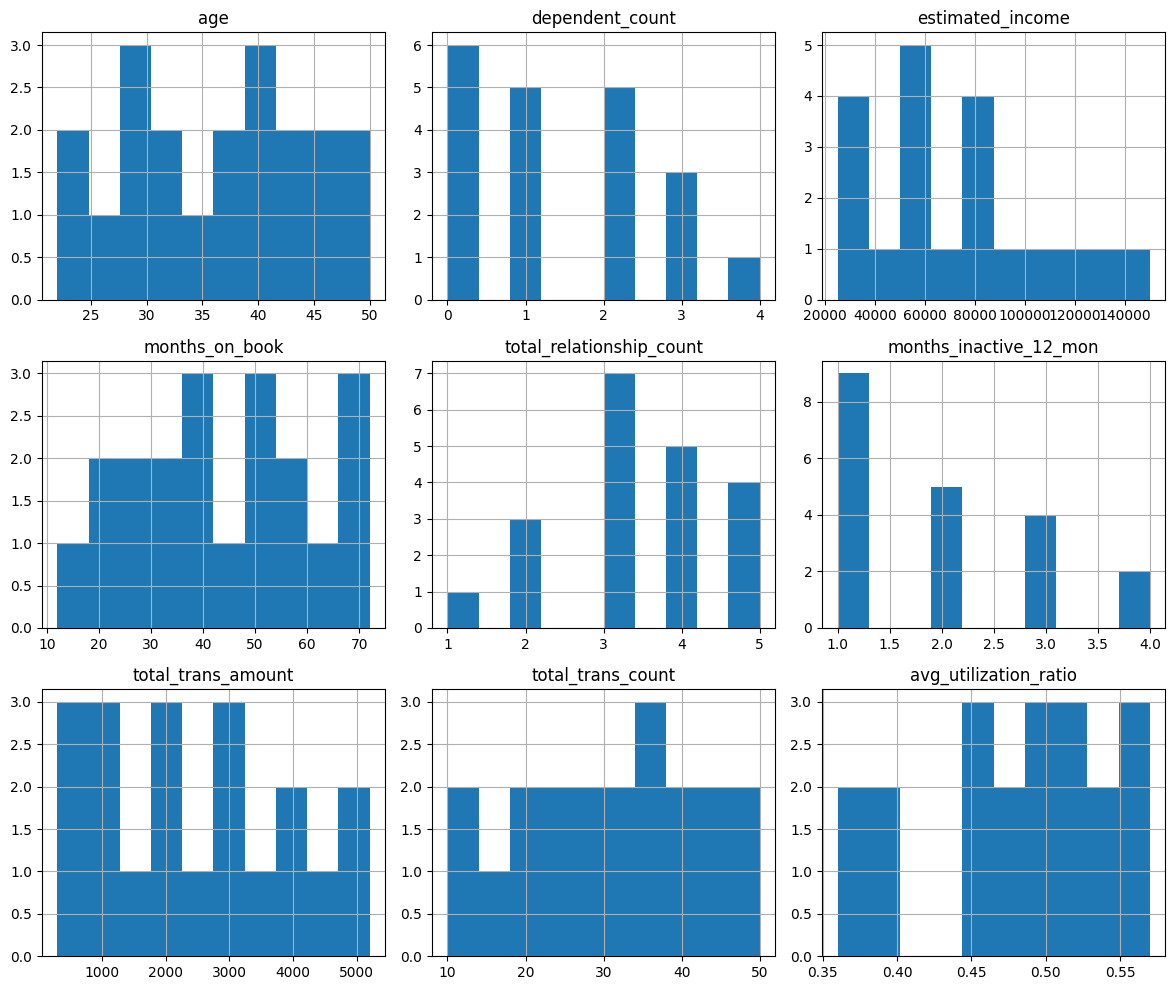

In [43]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
df.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

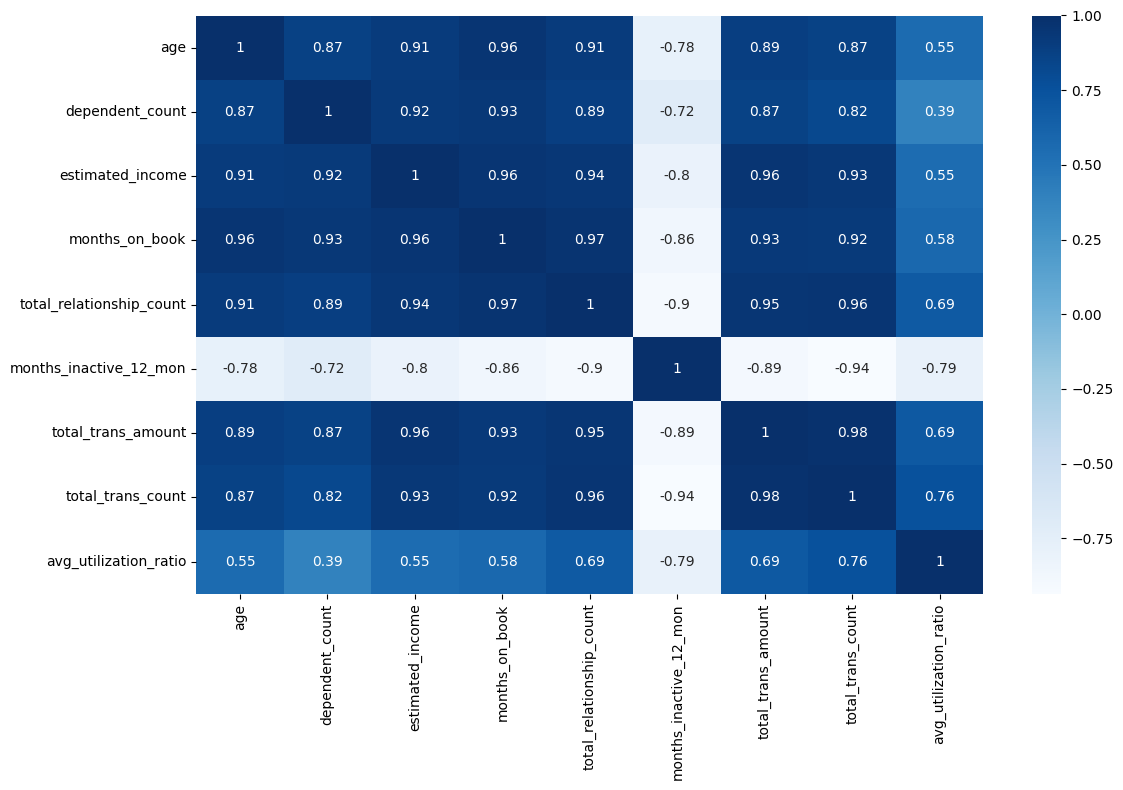

In [44]:
correlations = df.drop('customer_id', axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

# Feature Engineering

## 4. Feature Engineering

Prepare the data for clustering by:
1. Converting categorical variables to numeric
   - Gender: M/F → 1/0
   - Education levels: Ordinal encoding
   - Marital status: One-hot encoding
2. Keeping meaningful features
3. Standardizing numerical features

In [45]:
customers_modif = df.copy()

customers_modif['gender'] = df['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,total_trans_amount,total_trans_count,avg_utilization_ratio
0,1001,28,1,1,College,Single,45000,36,3,2,1250.75,25,0.51
1,1002,35,0,2,Post-Graduate,Married,75000,48,4,1,3200.00,35,0.46
2,1003,24,1,0,College,Single,35000,24,2,3,450.25,15,0.40
3,1004,42,1,3,Doctorate,Married,120000,60,5,1,4500.50,45,0.57
4,1005,38,0,1,Post-Graduate,Divorced,65000,42,3,2,1800.25,28,0.46


In [46]:
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2, 
                     'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}
customers_modif['education_level'] = customers_modif['education_level'].map(education_mapping)

customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,total_trans_amount,total_trans_count,avg_utilization_ratio
0,1001,28,1,1,2,Single,45000,36,3,2,1250.75,25,0.51
1,1002,35,0,2,4,Married,75000,48,4,1,3200.00,35,0.46
2,1003,24,1,0,2,Single,35000,24,2,3,450.25,15,0.40
3,1004,42,1,3,5,Married,120000,60,5,1,4500.50,45,0.57
4,1005,38,0,1,4,Divorced,65000,42,3,2,1800.25,28,0.46


In [47]:
dummies = pd.get_dummies(customers_modif[['marital_status']]) #testing without , drop_first=True

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['marital_status'], axis=1, inplace=True)

print(customers_modif.info())
customers_modif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               20 non-null     int64  
 1   age                       20 non-null     int64  
 2   gender                    20 non-null     int64  
 3   dependent_count           20 non-null     int64  
 4   education_level           20 non-null     int64  
 5   estimated_income          20 non-null     int64  
 6   months_on_book            20 non-null     int64  
 7   total_relationship_count  20 non-null     int64  
 8   months_inactive_12_mon    20 non-null     int64  
 9   total_trans_amount        20 non-null     float64
 10  total_trans_count         20 non-null     int64  
 11  avg_utilization_ratio     20 non-null     float64
 12  marital_status_Divorced   20 non-null     bool   
 13  marital_status_Married    20 non-null     bool   
 14  marital_stat

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,1001,28,1,1,2,45000,36,3,2,1250.75,25,0.51,False,False,True,False
1,1002,35,0,2,4,75000,48,4,1,3200.00,35,0.46,False,True,False,False
2,1003,24,1,0,2,35000,24,2,3,450.25,15,0.40,False,False,True,False
3,1004,42,1,3,5,120000,60,5,1,4500.50,45,0.57,False,True,False,False
4,1005,38,0,1,4,65000,42,3,2,1800.25,28,0.46,True,False,False,False


# Scaling the Data

## 5. Data Preprocessing

Scale the features to ensure all variables contribute equally to the clustering:
- Use StandardScaler to normalize numerical features
- This step is crucial as K-means is sensitive to feature scales

In [48]:
X = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

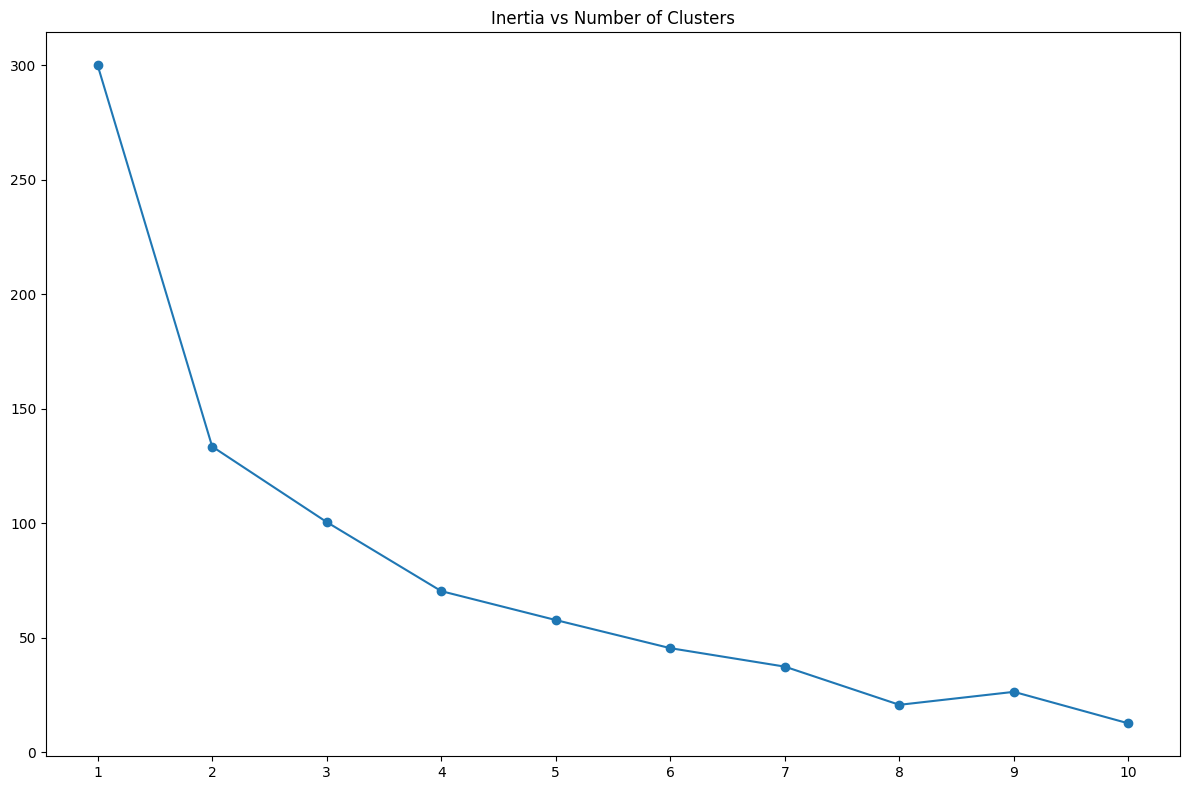

In [49]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

## 6. K-means Clustering

Determine optimal number of clusters and perform clustering:
1. Use elbow method to find optimal k
2. Apply K-means clustering
3. Add cluster labels to original dataframe

In [50]:
model = KMeans(n_clusters=8)
y = model.fit_predict(X_scaled)

y

array([1, 6, 7, 0, 2, 4, 6, 5, 0, 2, 6, 3, 0, 1, 4, 6, 5, 0, 2, 6],
      dtype=int32)

In [51]:
df['CLUSTER'] = y + 1
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,1001,28,M,1,College,Single,45000,36,3,2,1250.75,25,0.51,2
1,1002,35,F,2,Post-Graduate,Married,75000,48,4,1,3200.00,35,0.46,7
2,1003,24,M,0,College,Single,35000,24,2,3,450.25,15,0.40,8
3,1004,42,M,3,Doctorate,Married,120000,60,5,1,4500.50,45,0.57,1
4,1005,38,F,1,Post-Graduate,Divorced,65000,42,3,2,1800.25,28,0.46,3


In [52]:
df['CLUSTER'].value_counts()

CLUSTER
7    5
1    4
3    3
2    2
5    2
6    2
8    1
4    1
Name: count, dtype: int64

## 7. Cluster Analysis and Visualization

Create visualizations to understand cluster characteristics:
1. Bar plots for numeric features by cluster
2. Scatter plots for key relationships
3. Distribution of categorical variables within clusters

These visualizations help identify distinct patterns in each cluster.

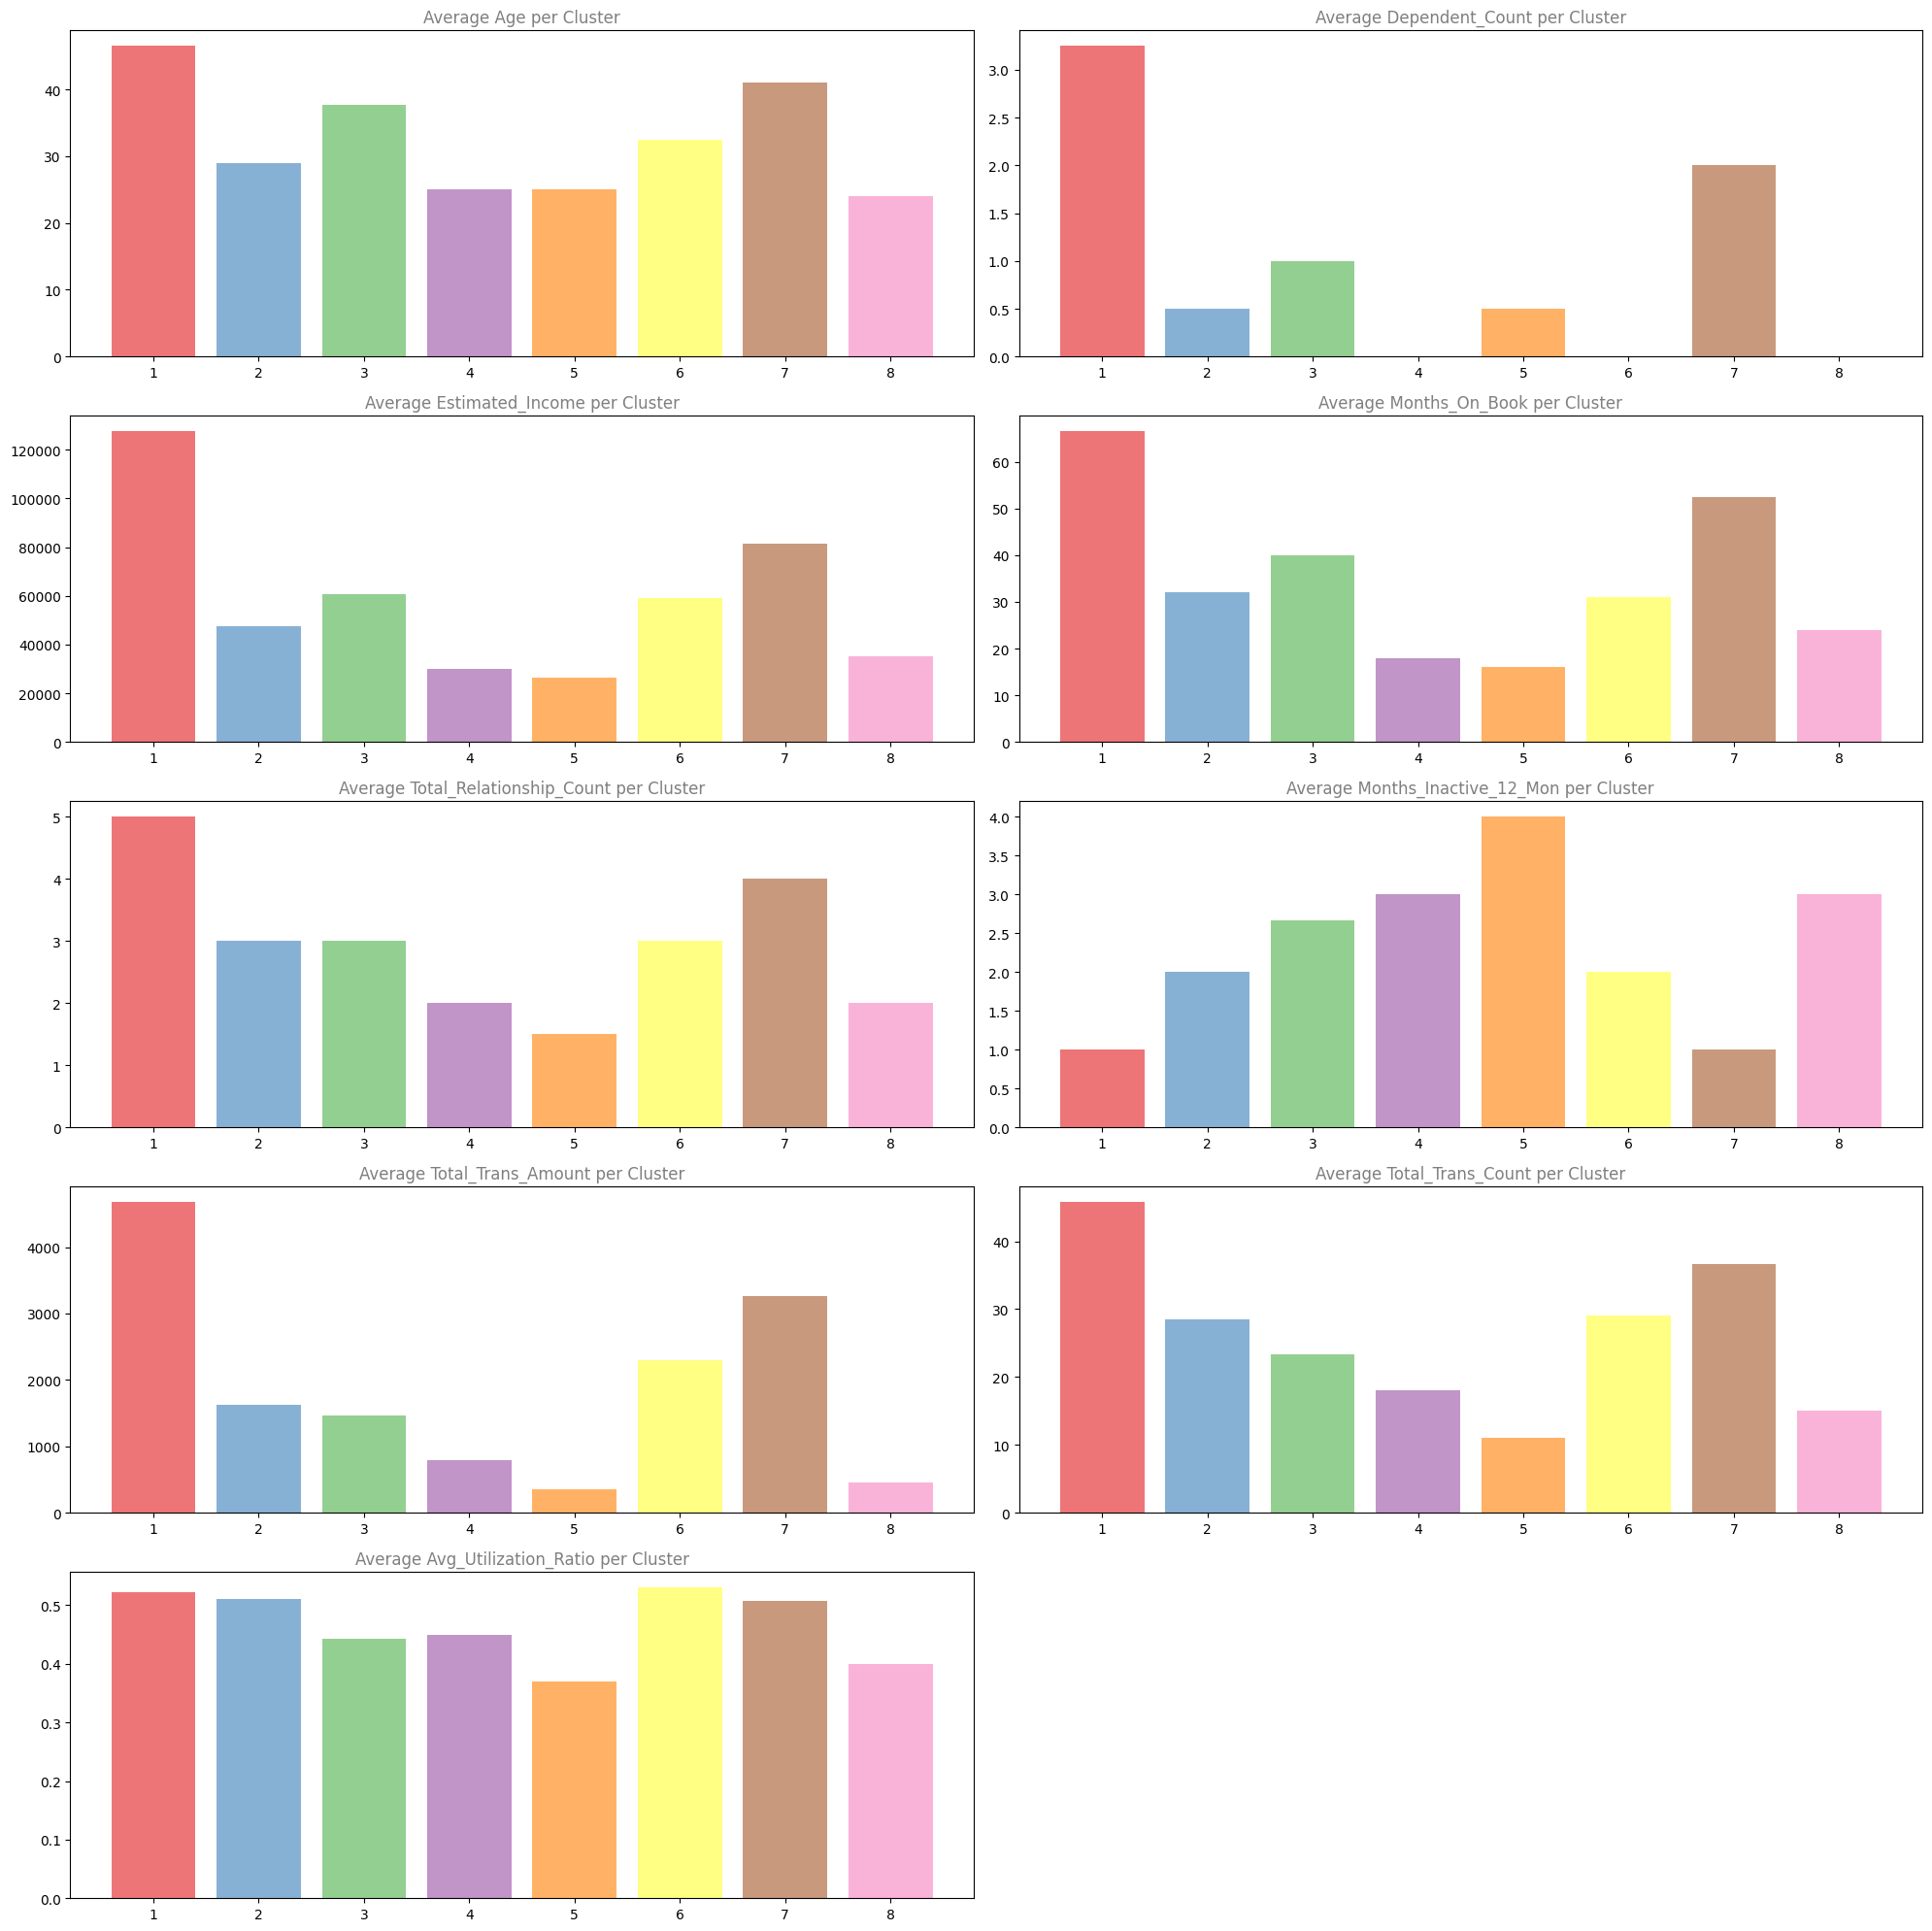

In [53]:
numeric_columns = df.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

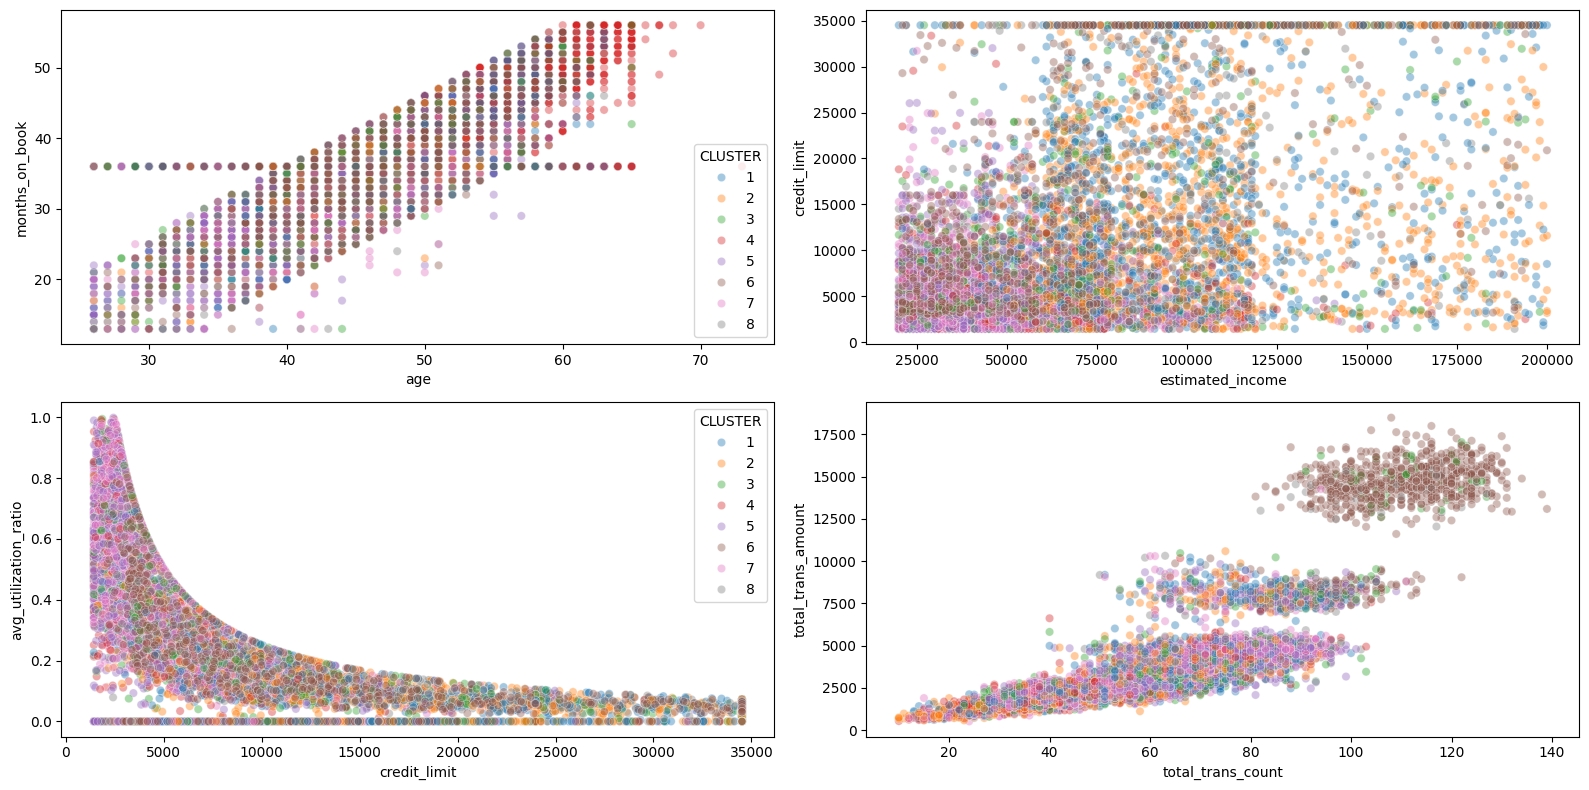

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=df, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

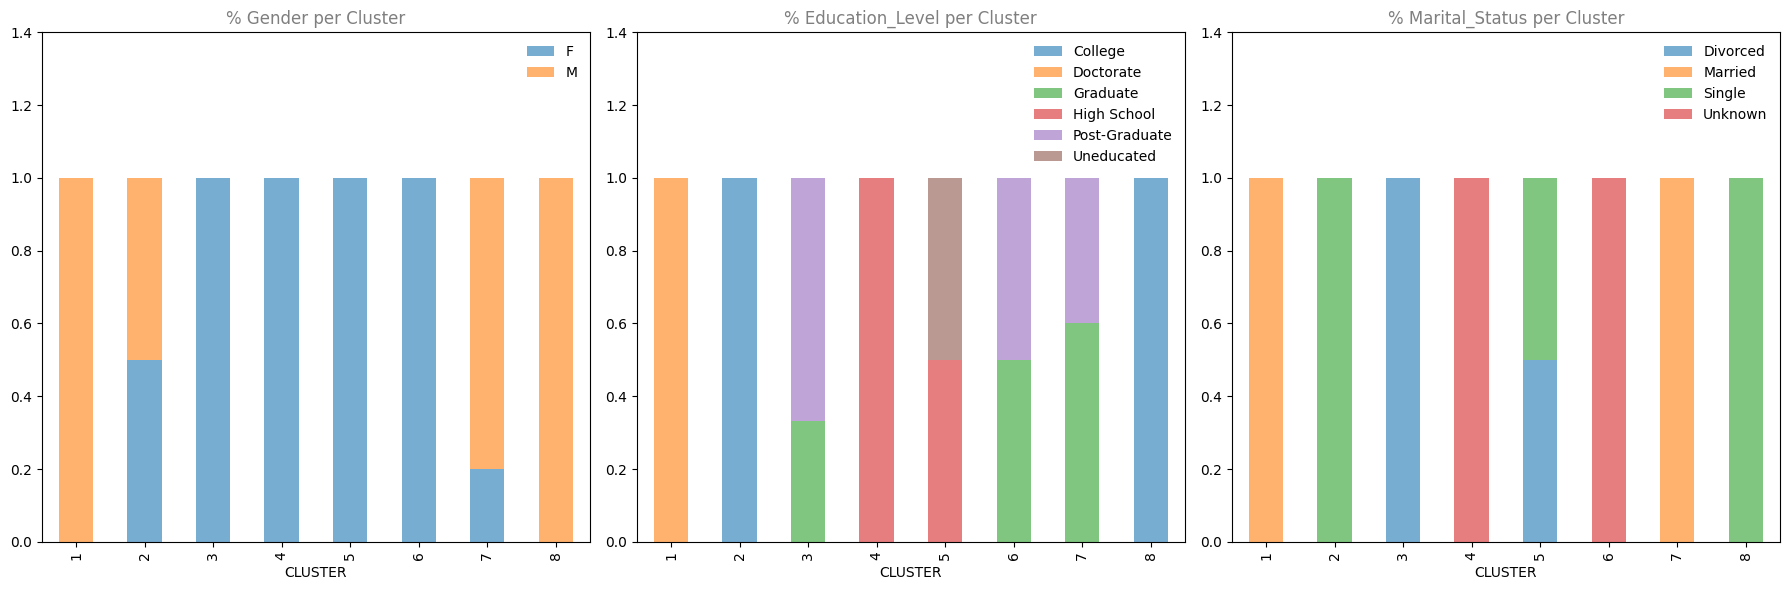

In [54]:
cat_columns = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    # ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

## 8. Business Insights

Key findings from our clustering analysis:

### High-Value Segments (Clusters 1 & 2)
- Predominantly male customers
- High income and credit limits
- Conservative credit usage
- Different marital status patterns

### Mid-Market Segments (Clusters 3 & 6)
- Mixed gender distribution
- Average to high transaction activity
- Moderate credit limits

### Credit-Dependent Segments (Clusters 4, 5 & 7)
- Predominantly female customers
- Higher utilization ratios
- Lower income levels
- Varied marital status

### General Segment (Cluster 8)
- Mixed characteristics
- Average values across metrics
- May need further investigation

## Marketing Implications

1. **Targeted Products:**
   - Premium cards for Clusters 1 & 2
   - Balance transfer offers for Clusters 4, 5 & 7
   - Rewards programs for Cluster 6

2. **Risk Management:**
   - Monitor high utilization in Clusters 4, 5 & 7
   - Potential for credit limit increases in Clusters 1 & 2

3. **Customer Engagement:**
   - Loyalty programs for high-value segments
   - Financial education for high-utilization segments
   - Customized communication strategies for each segment

**Cluster 1**
- Predominately male
- Single
- High credit limit
- High income (~100k)
- Low average utilization ratio (10%)

**Cluster 2**
- Predominately male
- Married
- Relatively high credit limit
- High income (~100k)
- Low average utilization ratio (15%)
- Higher dependent average (~2.5)

**Cluster 3**
- Split between male and female
- Divorced
- Average income and credit limit

**Cluster 4**
- 60% female
- ~70% married
- Oldest average age (~60)
- Lowest average # of dependents (~1)
- Highest months on book (potentially more loyal?)
- Lower credit limit and higher utilization ratio

**Cluster 5**
- 90% female
- Single
- Lowest average income (~40)
- Low credit limit (~4k)
- One of highest utilization ratios

**Cluster 6**
- 60% male
- Split between single and married
- Highest average transaction count and average amount by a large margin
- High credit limit
- Slightly higher than average income (~70k)

**Cluster 7**
- 90% female
- Married
- Low credit limit paired with high utilization ratio
- Lowest income average (~40k)
- Highest average dependents (~2.5)

**Cluster 8**
- Split between female and male
- Marital status is unknown
- All other variables somewhat represent the overall averages, indicating that this cluster may be overfit/not valuable